In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Master Data

In [2]:
master = pd.read_excel(r"G:\Stage 3\Master.xlsx")
master.shape

(30, 2)

In [3]:
master.head()

,Stall,Size
0,1,151315
1,2,202307
2,3,37392
3,4,205863
4,5,34875


In [4]:
master['Stall'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], dtype=int64)

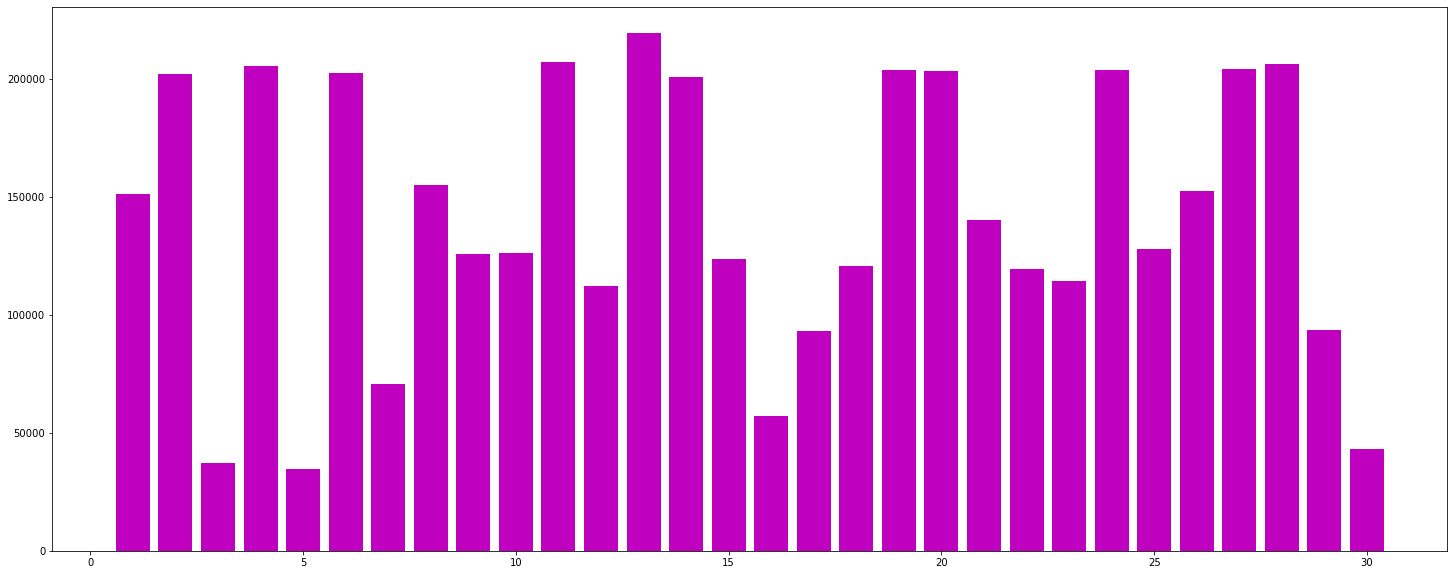

In [5]:
plt.figure(figsize=(25,10))
plt.bar(master['Stall'],master['Size'],color='m')
plt.show()

#### More Attributes data

In [5]:
more_attributes = pd.read_excel(r"G:\Stage 3\More-Attributes.xlsx")
more_attributes.shape

(5460, 6)

In [6]:
more_attributes.head()

,ID,Date_in_a_week,Campaign 1,Campaign 2,Consumer Price Index,Holiday
0,1,2010-02-05,NaN,NaN,211.096358,False
1,1,2010-02-12,NaN,NaN,211.242170,True
2,1,2010-02-19,NaN,NaN,211.289143,False
3,1,2010-02-26,NaN,NaN,211.319643,False
4,1,2010-03-05,NaN,NaN,211.350143,False


In [7]:
more_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    5460 non-null   int64         
 1   Date_in_a_week        5460 non-null   datetime64[ns]
 2   Campaign 1            2698 non-null   float64       
 3   Campaign 2            2120 non-null   float64       
 4   Consumer Price Index  5070 non-null   float64       
 5   Holiday               5460 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1)
memory usage: 218.7 KB


In [8]:
more_attributes.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
ID,5460.0,15.500000,8.656234,1.000,1.000000,2.000000,3.9000,8.000000,15.500000,23.000000,27.100000,29.000000,29.00000,30.000000,30.000000,30.000000,30.000000
Campaign 1,2698.0,8027.345845,9572.977138,-2781.450,72.771700,584.901000,1133.5800,2835.152500,5578.160000,9742.045000,15661.462000,23294.565000,25949.31000,29371.499500,35735.282600,56148.727100,103184.980000
Campaign 2,2120.0,3713.631113,9540.395718,-265.760,0.000000,3.095000,11.2270,73.895000,380.710000,2547.300000,9340.615000,19634.192000,25366.70680,31938.656600,38261.055000,49674.105600,104519.540000
Consumer Price Index,5070.0,172.964196,40.354289,126.064,126.114581,126.669267,129.4306,132.756667,162.433445,214.850006,222.629172,225.097338,225.43079,225.860301,227.056366,227.826505,228.976456


In [9]:
more_attributes.isnull().sum()

ID                         0
Date_in_a_week             0
Campaign 1              2762
Campaign 2              3340
Consumer Price Index     390
Holiday                    0
dtype: int64

In [10]:
more_attributes['year']=pd.DatetimeIndex(more_attributes['Date_in_a_week']).year
more_attributes['month']=pd.DatetimeIndex(more_attributes['Date_in_a_week']).month
more_attributes['day']=pd.DatetimeIndex(more_attributes['Date_in_a_week']).day

In [11]:
more_attributes['year'].unique()

array([2010, 2011, 2012, 2013], dtype=int64)

##### Treating missing values

In [12]:
m = more_attributes[more_attributes['Consumer Price Index'].isnull() & (more_attributes['year'] == 2013)]
m

,ID,Date_in_a_week,Campaign 1,Campaign 2,Consumer Price Index,Holiday,year,month,day
169,1,2013-05-03,2298.63,2.00,NaN,False,2013,5,3
170,1,2013-05-10,4624.61,83.88,NaN,False,2013,5,10
171,1,2013-05-17,16170.50,92.00,NaN,False,2013,5,17
172,1,2013-05-24,7959.89,178.00,NaN,False,2013,5,24
173,1,2013-05-31,2369.77,142.45,NaN,False,2013,5,31
...,...,...,...,...,...,...,...,...,...
5455,30,2013-06-28,1063.88,NaN,NaN,False,2013,6,28
5456,30,2013-07-05,378.21,NaN,NaN,False,2013,7,5
5457,30,2013-07-12,466.05,NaN,NaN,False,2013,7,12
5458,30,2013-07-19,189.49,NaN,NaN,False,2013,7,19


In [13]:
missing_cpi = more_attributes[more_attributes['Consumer Price Index'].isnull()]
missing_cpi

,ID,Date_in_a_week,Campaign 1,Campaign 2,Consumer Price Index,Holiday,year,month,day
169,1,2013-05-03,2298.63,2.00,NaN,False,2013,5,3
170,1,2013-05-10,4624.61,83.88,NaN,False,2013,5,10
171,1,2013-05-17,16170.50,92.00,NaN,False,2013,5,17
172,1,2013-05-24,7959.89,178.00,NaN,False,2013,5,24
173,1,2013-05-31,2369.77,142.45,NaN,False,2013,5,31
...,...,...,...,...,...,...,...,...,...
5455,30,2013-06-28,1063.88,NaN,NaN,False,2013,6,28
5456,30,2013-07-05,378.21,NaN,NaN,False,2013,7,5
5457,30,2013-07-12,466.05,NaN,NaN,False,2013,7,12
5458,30,2013-07-19,189.49,NaN,NaN,False,2013,7,19


In [14]:
missing_cpi['year']=pd.DatetimeIndex(missing_cpi['Date_in_a_week']).year

<ipython-input-14-f921a6597108>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_cpi['year']=pd.DatetimeIndex(missing_cpi['Date_in_a_week']).year


In [15]:
missing_cpi['year'].unique()
# This means consumer price index of 2013 is  missing because of the unavailablity of the data

array([2013], dtype=int64)

In [16]:
# Thus we will substitute the null values with previous year average
more_attributes['Consumer Price Index'] = more_attributes['Consumer Price Index'].fillna(173)

In [17]:
# In campaigns we are not seeing any trend thus we will substite the null values with their average
more_attributes['Campaign 1'] = more_attributes['Campaign 1'].fillna(5578)
more_attributes['Campaign 2'] = more_attributes['Campaign 2'].fillna(3714)

In [18]:
more_attributes.isnull().sum()

ID                      0
Date_in_a_week          0
Campaign 1              0
Campaign 2              0
Consumer Price Index    0
Holiday                 0
year                    0
month                   0
day                     0
dtype: int64

In [19]:
# Outlier treatment
more_attributes['Campaign 1'] = np.where(more_attributes['Campaign 1'] < more_attributes['Campaign 1'].quantile(0.01),more_attributes['Campaign 1'].quantile(0.01),more_attributes['Campaign 1'])
more_attributes['Campaign 1'] = np.where(more_attributes['Campaign 1'] > more_attributes['Campaign 1'].quantile(0.99),more_attributes['Campaign 1'].quantile(0.99),more_attributes['Campaign 1'])
more_attributes['Campaign 2'] = np.where(more_attributes['Campaign 2'] < more_attributes['Campaign 2'].quantile(0.01),more_attributes['Campaign 2'].quantile(0.01),more_attributes['Campaign 2'])
more_attributes['Campaign 2'] = np.where(more_attributes['Campaign 2'] > more_attributes['Campaign 2'].quantile(0.99),more_attributes['Campaign 2'].quantile(0.99),more_attributes['Campaign 2'])

(array([ 919., 3515.,  458.,  245.,  122.,   47.,   38.,   30.,   18.,
          68.]),
 array([  210.5999 ,  3742.63116,  7274.66242, 10806.69368, 14338.72494,
        17870.7562 , 21402.78746, 24934.81872, 28466.84998, 31998.88124,
        35530.9125 ]),
 <BarContainer object of 10 artists>)

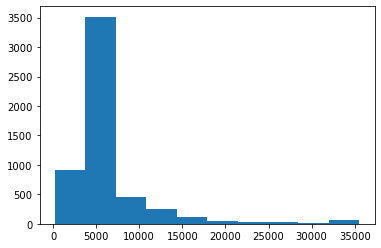

In [84]:
plt.hist(more_attributes['Campaign 1'])

(array([1671., 3508.,   80.,   51.,   31.,   17.,   13.,   11.,    9.,
          69.]),
 array([5.00000000e-01, 3.44156607e+03, 6.88263214e+03, 1.03236982e+04,
        1.37647643e+04, 1.72058303e+04, 2.06468964e+04, 2.40879625e+04,
        2.75290286e+04, 3.09700946e+04, 3.44111607e+04]),
 <BarContainer object of 10 artists>)

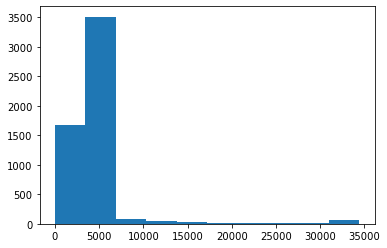

In [85]:
plt.hist(more_attributes['Campaign 2'])

(array([1651.,  884.,    0.,    0.,  390.,   90.,  351.,  202., 1037.,
         855.]),
 array([126.064     , 136.35524563, 146.64649126, 156.93773689,
        167.22898252, 177.52022815, 187.81147378, 198.10271941,
        208.39396504, 218.68521067, 228.9764563 ]),
 <BarContainer object of 10 artists>)

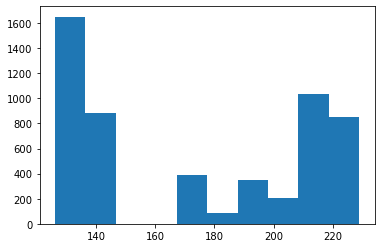

In [86]:
plt.hist(more_attributes['Consumer Price Index'])

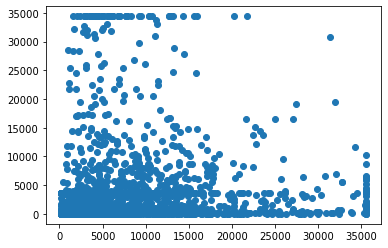

In [87]:
plt.scatter(more_attributes['Campaign 1'],more_attributes['Campaign 2'])

#### Train Data

In [2]:
train_data = pd.read_excel(r"G:\Stage 3\train_data.xlsx")
train_data.shape

(293704, 5)

In [3]:
train_data.head()

,Book_Stall,Genre,Week_Date,Sales_in_a_week,Holiday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
train_data.isnull().sum()

Book_Stall         0
Genre              0
Week_Date          0
Sales_in_a_week    0
Holiday            0
dtype: int64

In [5]:
train_data.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Book_Stall,293704.0,15.395538,8.578611,1.00,1.0000,2.0,3.000,8.00,15.00,23.0000,27.000,29.000,29.0000,29.0000,30.0000,30.0000,30.00
Genre,293704.0,43.805471,29.911554,1.00,1.0000,4.0,7.000,19.00,36.00,72.0000,91.000,95.000,95.0000,96.0000,97.0000,98.0000,99.00
Sales_in_a_week,293704.0,17121.330293,23959.975137,-4988.94,6.2506,125.0,560.153,2634.67,8352.06,21598.0775,45080.896,65056.795,71517.9384,78948.0108,89878.0994,113459.3853,693099.36


In [3]:
train_data['Sales_in_a_week'] = np.where(train_data['Sales_in_a_week'] < train_data['Sales_in_a_week'].quantile(0.01),train_data['Sales_in_a_week'].quantile(0.01),train_data['Sales_in_a_week'])
train_data['Sales_in_a_week'] = np.where(train_data['Sales_in_a_week'] > train_data['Sales_in_a_week'].quantile(0.99),train_data['Sales_in_a_week'].quantile(0.99),train_data['Sales_in_a_week'])

In [4]:
train_data['year']=pd.DatetimeIndex(train_data['Week_Date']).year
train_data['month']=pd.DatetimeIndex(train_data['Week_Date']).month
train_data['day']=pd.DatetimeIndex(train_data['Week_Date']).day

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Book_Stall', ylabel='count'>

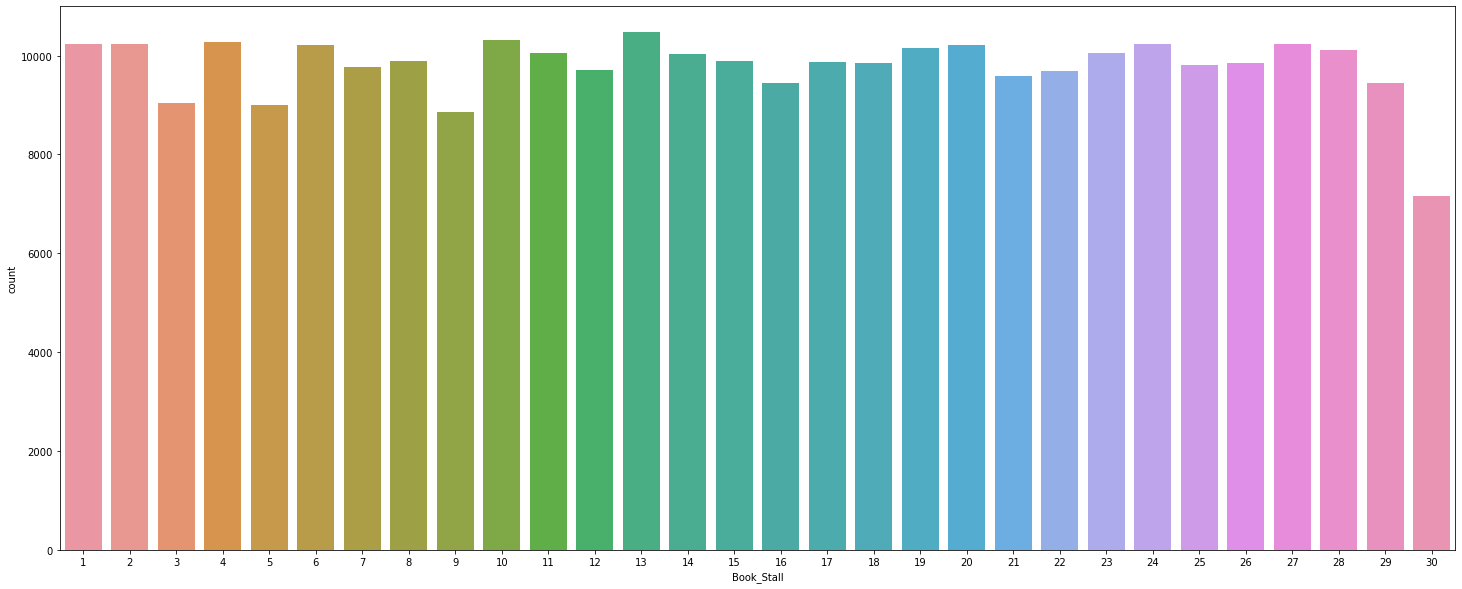

In [89]:
plt.figure(figsize=(25,10))
sns.countplot(train_data['Book_Stall'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genre', ylabel='count'>

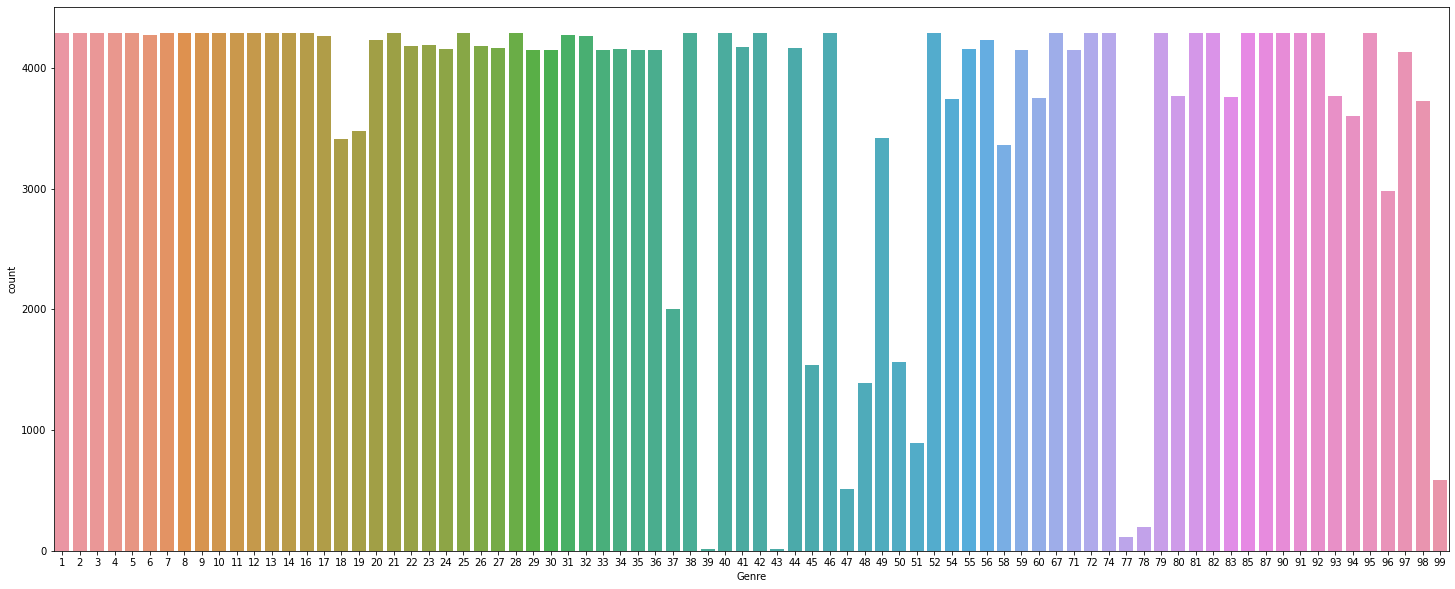

In [92]:
plt.figure(figsize=(25,10))
sns.countplot(train_data['Genre'])

(array([171409.,  52418.,  25309.,  15550.,   9588.,   6167.,   4621.,
          2927.,   1622.,   4093.]),
 array([6.25060000e+00, 1.13515641e+04, 2.26968775e+04, 3.40421910e+04,
        4.53875045e+04, 5.67328179e+04, 6.80781314e+04, 7.94234449e+04,
        9.07687584e+04, 1.02114072e+05, 1.13459385e+05]),
 <BarContainer object of 10 artists>)

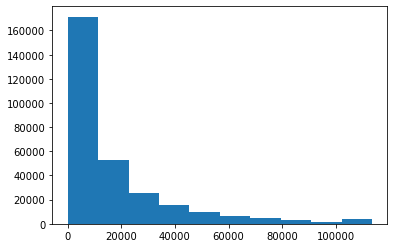

In [93]:
plt.hist(train_data['Sales_in_a_week'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Holiday', ylabel='count'>

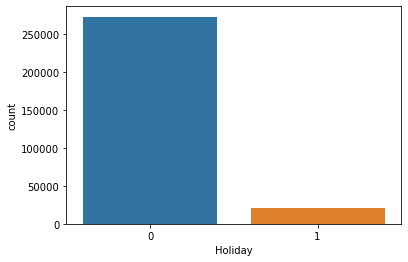

In [94]:
sns.countplot(train_data['Holiday'])

#### Test data

In [5]:
test_data = pd.read_excel(r'G:\Stage 3\test_sales.xlsx')
test_data.shape

(80021, 5)

In [27]:
test_data.head()

,ID,Book_Stall,Genre,Week_Date,Holiday
0,1,1,1,2012-11-02,False
1,2,1,1,2012-11-09,False
2,3,1,1,2012-11-16,False
3,4,1,1,2012-11-23,True
4,5,1,1,2012-11-30,False


In [6]:
test_data['year']=pd.DatetimeIndex(test_data['Week_Date']).year
test_data['month']=pd.DatetimeIndex(test_data['Week_Date']).month
test_data['day']=pd.DatetimeIndex(test_data['Week_Date']).day

In [7]:
test_data['Book_Stall'].nunique()

30

In [8]:
train_data['Holiday'] = np.where(train_data['Holiday']==True,1,0)
test_data['Holiday'] = np.where(test_data['Holiday']==True,1,0)

In [34]:
test_data_new = test_data.drop(columns=['ID','Week_Date'])

### MODEL BUILDING

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [59]:
x_train.columns

Index(['Book_Stall', 'Genre', 'Holiday', 'year', 'month', 'day'], dtype='object')

In [58]:
test_data_new.columns

Index(['Book_Stall', 'Genre', 'Week_Date', 'Holiday', 'year', 'month', 'day'], dtype='object')

In [35]:
x=train_data.drop(columns = ['Sales_in_a_week','Week_Date'])
y=train_data['Sales_in_a_week']

In [36]:
# Splitting the data for validation of the data
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.25,random_state=0)

### LINEAR REGRESSION

In [36]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print("R^2 of train :",lr.score(x_train,y_train))
print("R^2 of val :",lr.score(x_val,y_val))

R^2 of train : 0.012496965565073626
R^2 of val : 0.01312552269282552


In [37]:
pred_train = lr.predict(x_train)
pred_val = lr.predict(x_val)

In [38]:
print("RMSE of train :",np.sqrt(np.mean(((y_train-pred_train)**2))))
print("RMSE of val :",np.sqrt(np.mean(((y_val-pred_val)**2))))
print("MAE of train :",np.mean(np.abs(((y_train-pred_train)))))
print("MAE of val :",np.mean(np.abs(((y_val-pred_val)))))

RMSE of train : 21779.42187202476
RMSE of val : 21761.320649173642
MAE of train : 15509.366245995956
MAE of val : 15476.240476999774


In [39]:
# R^2 is very low thus model not working good.

### DECISION TREE REGRESSOR

In [17]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [18]:
pred_train_dt = dt.predict(x_train)
pred_val_dt = dt.predict(x_val)

In [19]:
print("R^2 of train :",dt.score(x_train,y_train))
print("R^2 of val :",dt.score(x_val,y_val))
print("RMSE of train :",np.sqrt(np.mean(((y_train-pred_train_dt)**2))))
print("RMSE of val :",np.sqrt(np.mean(((y_val-pred_val_dt)**2))))
print("MAE of train :",np.mean(np.abs(((y_train-pred_train_dt)))))
print("MAE of val :",np.mean(np.abs(((y_val-pred_val_dt)))))

R^2 of train : 1.0
R^2 of val : 0.9683368212633718
RMSE of train : 3.475903252280859e-12
RMSE of val : 3897.9076529114304
MAE of train : 2.982044145609223e-13
MAE of val : 1802.1421147999308


In [ ]:
dt2 = DecisionTreeRegressor(criterion = 'mae',max_depth = 5)
dt2.fit(x_train,y_train)

C:\Users\SIDDHARTH KATHURIA\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


In [96]:
pred_train_dt2 = dt2.predict(x_train)
pred_val_dt2 = dt2.predict(x_val)

In [97]:
print("R^2 of train :",dt2.score(x_train,y_train))
print("R^2 of val :",dt2.score(x_val,y_val))
print("RMSE of train :",np.sqrt(np.mean(((y_train-pred_train_dt2)**2))))
print("RMSE of val :",np.sqrt(np.mean(((y_val-pred_val_dt2)**2))))
print("MAE of train :",np.mean(np.abs(((y_train-pred_train_dt2)))))
print("MAE of val :",np.mean(np.abs(((y_val-pred_val_dt2)))))

R^2 of train : 0.2881796614030243
R^2 of val : 0.2873469422536622
RMSE of train : 18491.0819930694
RMSE of val : 18492.40371096364
MAE of train : 10656.786800929487
MAE of val : 10601.119175884358


In [64]:
pred_test_dt = dt.predict(test_data_new)

In [65]:
dt_submission = pd.DataFrame(test_data['ID'],columns=["ID"])
dt_submission['Sales_in_a_week'] = pred_test_dt
dt_submission.set_index(test_data['ID'],inplace=True)
dt_submission.drop(columns=["ID"],inplace=True)

In [66]:
dt_submission.to_csv(r'F:\Stage 3\dt_submission.csv')

### RANDOM FOREST REGRESSOR

In [37]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
print('r2 of train:', rf.score(x_train,y_train))
print('r2 of val:', rf.score(x_val,y_val))

r2 of train: 0.983306261553913
r2 of val: 0.9651298384172853


In [38]:
pred_train_rf = rf.predict(x_train)
pred_val_rf = rf.predict(x_val)

In [39]:
print("r2 of train :" ,rf.score(x_train,y_train))
print("r2 of val :" ,rf.score(x_val,y_val))
print("RMSE of train :",np.sqrt(np.mean(((y_train-pred_train_rf)**2))))
print("RMSE of val :",np.sqrt(np.mean(((y_val-pred_val_rf)**2))))
print("MAE of train :",np.mean(np.abs(((y_train-pred_train_rf)))))
print("MAE of val :",np.mean(np.abs(((y_val-pred_val_rf)))))

r2 of train : 0.983306261553913
r2 of val : 0.9651298384172853
RMSE of train : 2831.7436176519745
RMSE of val : 4090.5458930433538
MAE of train : 1233.55822233977
MAE of val : 1813.7499894661569


In [31]:
rf1=RandomForestRegressor(max_depth=8,n_estimators=150)
rf1.fit(x_train,y_train)

RandomForestRegressor(max_depth=8, n_estimators=150)

In [32]:
pred_train_rf1 = rf1.predict(x_train)
pred_val_rf1 = rf1.predict(x_val)

In [33]:
print("r2 of train :" ,rf1.score(x_train,y_train))
print("r2 of val :" ,rf1.score(x_val,y_val))
print("RMSE of train :",np.sqrt(np.mean(((y_train-pred_train_rf1)**2))))
print("RMSE of val :",np.sqrt(np.mean(((y_val-pred_val_rf1)**2))))
print("MAE of train :",np.mean(np.abs(((y_train-pred_train_rf1)))))
print("MAE of val :",np.mean(np.abs(((y_val-pred_val_rf1)))))

r2 of train : 0.6973664613944114
r2 of val : 0.6967509645434173
RMSE of train : 12056.899917951157
RMSE of val : 12062.963220501257
MAE of train : 7355.940946388369
MAE of val : 7351.660936185408


In [40]:
pred_test_rf=rf.predict(test_data_new)

In [41]:
rf_submission = pd.DataFrame(test_data['ID'],columns=["ID"])
rf_submission['Sales_in_a_week'] = pred_test_rf
rf_submission.set_index(test_data['ID'],inplace=True)
rf_submission.drop(columns=["ID"],inplace=True)
rf_submission.to_csv(r'G:\Stage 3\rf_submission2.csv')

### GRADIENT BOOSTING REGRESSOR

In [20]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
print("r2 for train :",gb.score(x_train,y_train))
print("r2 for val :",gb.score(x_val,y_val))

r2 for train : 0.6586317701368478
r2 for val : 0.6596919463099609


In [21]:
pred_train_gb = gb.predict(x_train)
pred_val_gb = gb.predict(x_val)

In [53]:
print("RMSE of train :",np.sqrt(np.mean(((y_train-pred_train_gb)**2))))
print("RMSE of val :",np.sqrt(np.mean(((y_val-pred_val_gb)**2))))
print("MAE of train :",np.mean(np.abs(((y_train-pred_train_gb)))))
print("MAE of val :",np.mean(np.abs(((y_val-pred_val_gb)))))

RMSE of train : 12805.268171843756
RMSE of val : 12778.809712765857
MAE of train : 8328.293378774799
MAE of val : 8307.017427320778


In [69]:
pred_test_gb=gb.predict(test_data_new)

In [70]:
gb_submission = pd.DataFrame(test_data['ID'],columns=["ID"])
gb_submission['Sales_in_a_week'] = pred_test_gb
gb_submission.set_index(test_data['ID'],inplace=True)
gb_submission.drop(columns=["ID"],inplace=True)
gb_submission.to_csv(r'F:\Stage 3\gb_submission.csv')

### XTREME GRADIENT BOOSTING REGRESSOR

In [54]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
print("r2 for train :",xgb.score(x_train,y_train))
print("r2 for val :",xgb.score(x_val,y_val))

r2 for train : 0.9427116216383487
r2 for val : 0.940741577506044


In [55]:
pred_train_xgb = gb.predict(x_train)
pred_val_xgb = gb.predict(x_val)

In [56]:
print("RMSE of train :",np.sqrt(np.mean(((y_train-pred_train_xgb)**2))))
print("RMSE of val :",np.sqrt(np.mean(((y_val-pred_val_xgb)**2))))
print("MAE of train :",np.mean(np.abs(((y_train-pred_train_xgb)))))
print("MAE of val :",np.mean(np.abs(((y_val-pred_val_xgb)))))

RMSE of train : 12805.268171843756
RMSE of val : 12778.809712765857
MAE of train : 8328.293378774799
MAE of val : 8307.017427320778


In [71]:
pred_test_xgb=xgb.predict(test_data_new)

In [72]:
xgb_submission = pd.DataFrame(test_data['ID'],columns=["ID"])
xgb_submission['Sales_in_a_week'] = pred_test_xgb
xgb_submission.set_index(test_data['ID'],inplace=True)
xgb_submission.drop(columns=["ID"],inplace=True)
xgb_submission.to_csv(r'F:\Stage 3\xgb_submission.csv')